# Install insightface


!pip install onnxruntime
!pip install insightface

In [1]:
import cv2
import matplotlib.pyplot as plt
import insightface
from insightface.app import FaceAnalysis

# Step 1 Detecting Faces

In [2]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640,640))

/Users/rafael.fonseca/Library/Python/3.9/lib/python/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/rafael.fonseca/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/rafael.fonseca/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/rafael.fonseca/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/rafael.fonseca/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/rafael.fonseca/.insightface/models/buffalo_l/w600k_r50.onnx rec

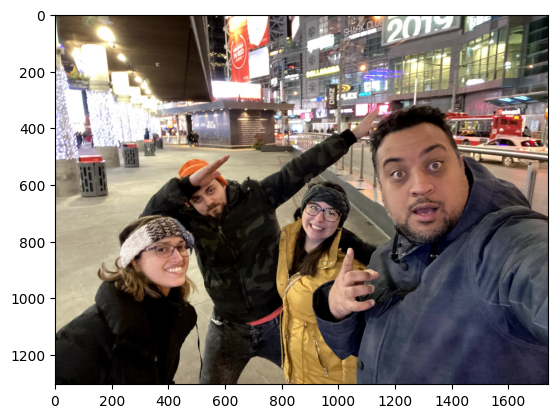

In [3]:
img = cv2.imread('img/friends.jpg')
plt.imshow(img[:,:,::-1])
plt.show()

In [4]:
faces = app.get(img)

/Users/rafael.fonseca/Library/Python/3.9/lib/python/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [5]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

# Crop and plot Faces

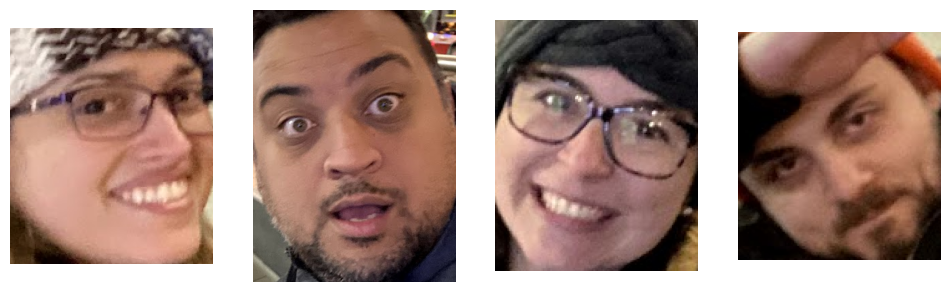

In [6]:
img = cv2.imread('img/friends.jpg')
fig, axs = plt.subplots(1, 4, figsize=(12,5))

for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('off')

# Get Gabi's Face

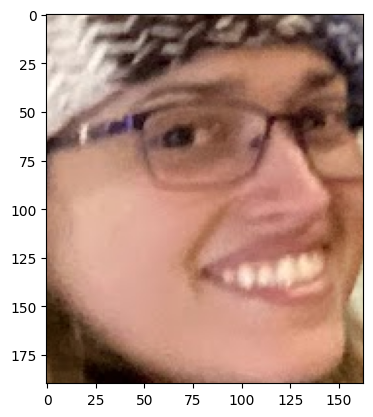

In [7]:
gabi_face = app.get(img)[0]
bbox = gabi_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

# Get Jolies Face

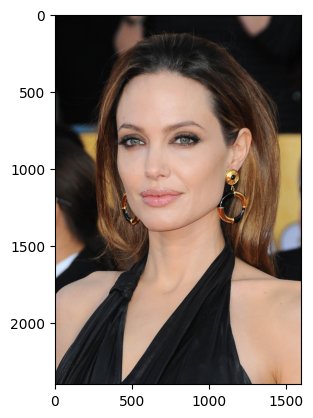

In [8]:
jolie_image = cv2.imread('img/jolie.jpg')
plt.imshow(jolie_image[:,:,::-1])
plt.show()

# Crop Jolie Face

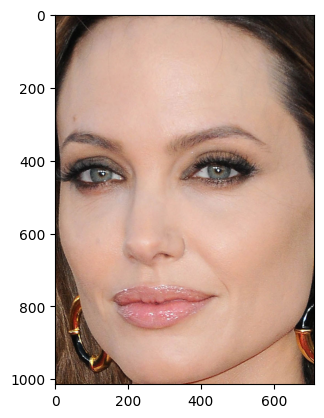

In [9]:
jolie_face = app.get(jolie_image)[0]
bbox = jolie_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(jolie_image[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

# Swapping Faces

In [10]:
swapper = insightface.model_zoo.get_model('model/inswapper_128.onnx', download=False, download_zip=False)
res = img.copy()
res = swapper.get(res, faces[0], jolie_face, paste_back=True)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


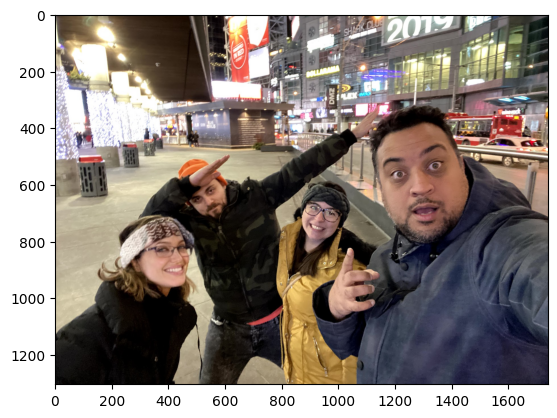

In [11]:
plt.imshow(res[:,:,::-1])
plt.show()

# Crop new Face

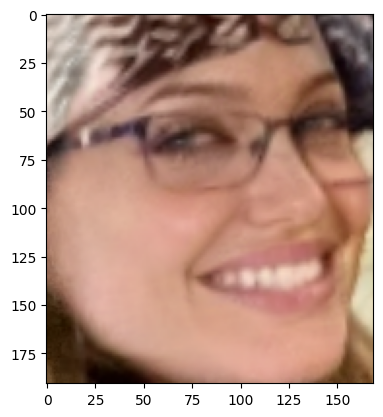

In [12]:
new_gabi_face = app.get(res)[0]
bbox = new_gabi_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(res[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()